In [242]:
import serial
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize

In [243]:
# Note 1: This python script was designed to run with Python 3.
#
# Note 2: The script uses "pyserial" which must be installed.  If you have
#         previously installed the "serial" package, it must be uninstalled
#         first.
#
# Note 3: While this script is running you can not re-program the Arduino.
#         Before downloading a new Arduino sketch, you must exit this
#         script first.
arduinoComPort = "COM5"


# Set the baud rate
# NOTE1: The baudRate for the sending and receiving programs must be the same!
# NOTE2: For faster communication, set the baudRate to 115200 below
#        and check that the arduino sketch you are using is updated as well.
baudRate = 9600


# open the serial port
serialPort = serial.Serial(arduinoComPort, baudRate, timeout=1)


panMin = 0
panMax = 50
panStep = 1
tiltMin = 0
tiltMax = 60
tiltStep = 1
numRows = int(((tiltMax-tiltMin)/tiltStep +1)*((panMax-panMin)/panStep +1))
ptsrData = [[0]*4] * numRows
# print(ptsrData)
# ptsrData.astype(int)
# print(ptsrData)

i = 0
# main loop to read data from the Arduino, then display it
while i < numRows:
    # print(ptsrData)
    # ask for a line of data from the serial port, the ".decode()" converts the
    # data from an "array of bytes", to a string
    lineOfData = serialPort.readline().decode()

    # check if data was received
    if len(lineOfData) > 0:
        # print(lineOfData)
        # print(len(lineOfData))

        if len(lineOfData) == 3:
            if int(lineOfData) == 1: # done with scan
                print(ptsrData)
                i = numRows
            elif int(lineOfData) == 0: # restarting scan
                ptsrData = np.zeros((numRows,4))
                i = 0
        else: # continue with this scan
            # data was received, convert it into 4 integers
            panPos, tiltPos, senseVal = (int(x) for x in lineOfData.split(','))

            # # print the results
            # print("panPos = " + str(panPos), end="")
            # print(", tiltPos = " + str(tiltPos), end="")
            # print(", senseVal = " + str(senseVal))
            print([panPos, tiltPos, senseVal, 0.0])
            ptsrData[i] = [panPos, tiltPos, senseVal, 0.0]
            i = i+1

[0, 0, 596, 0.0]
[0, 1, 612, 0.0]
[0, 2, 632, 0.0]
[0, 3, 545, 0.0]
[0, 4, 444, 0.0]
[0, 5, 44, 0.0]
[0, 6, 49, 0.0]
[0, 7, 6, 0.0]
[0, 8, 106, 0.0]
[0, 9, 26, 0.0]
[0, 10, 159, 0.0]
[0, 11, 48, 0.0]
[0, 12, 62, 0.0]
[0, 13, 62, 0.0]
[0, 14, 57, 0.0]
[0, 15, 28, 0.0]
[0, 16, 0, 0.0]
[0, 17, 14, 0.0]
[0, 18, 5, 0.0]
[0, 19, 8, 0.0]
[0, 20, 35, 0.0]
[0, 21, 4, 0.0]
[0, 22, 5, 0.0]
[0, 23, 19, 0.0]
[0, 24, 142, 0.0]
[0, 25, 97, 0.0]
[0, 26, 73, 0.0]
[0, 27, 18, 0.0]
[0, 28, 43, 0.0]
[0, 29, 8, 0.0]
[0, 30, 39, 0.0]
[0, 31, 0, 0.0]
[0, 32, 4, 0.0]
[0, 33, 188, 0.0]
[0, 34, 53, 0.0]
[0, 35, 19, 0.0]
[0, 36, 5, 0.0]
[0, 37, 5, 0.0]
[0, 38, 6, 0.0]
[0, 39, 12, 0.0]
[0, 40, 23, 0.0]
[0, 41, 4, 0.0]
[0, 42, 5, 0.0]
[0, 43, 204, 0.0]
[0, 44, 243, 0.0]
[0, 45, 133, 0.0]
[0, 46, 5, 0.0]
[0, 47, 5, 0.0]
[0, 48, 6, 0.0]
[0, 49, 12, 0.0]
[0, 50, 4, 0.0]
[0, 51, 4, 0.0]
[0, 52, 144, 0.0]
[0, 53, 203, 0.0]
[0, 54, 225, 0.0]
[0, 55, 300, 0.0]
[0, 56, 300, 0.0]
[0, 57, 330, 0.0]
[0, 58, 350, 0.0]
[0, 59,

In [244]:
# print(ptsrData)
ptsrNP = np.array(ptsrData)
print(ptsrNP)


[[  0.   0. 596.   0.]
 [  0.   1. 612.   0.]
 [  0.   2. 632.   0.]
 ...
 [ 50.  58. 387.   0.]
 [ 50.  59. 400.   0.]
 [ 50.  60. 411.   0.]]


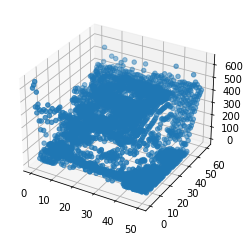

In [245]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(ptsrNP[:,0], ptsrNP[:,1], ptsrNP[:,2])


[[ 20.32 460.  ]
 [ 25.4  405.  ]
 [ 27.94 375.  ]
 [ 30.48 355.  ]
 [ 33.02 330.  ]
 [ 35.56 310.  ]
 [ 40.64 273.  ]
 [ 50.8  211.  ]
 [ 60.96 173.  ]
 [ 71.12 157.  ]
 [ 81.28 138.  ]
 [ 91.44 110.  ]
 [101.6  102.  ]
 [111.76  95.  ]
 [121.92  82.  ]
 [132.08  65.  ]
 [142.24  50.  ]
 [152.4   40.  ]]
[-3.65061637e-13  6.06411748e-10 -3.91519416e-07  1.20403803e-04
 -1.62491468e-02  1.60606055e-01  1.64109357e+02]
[[  0.           0.         596.          20.32      ]
 [  0.           1.         612.          20.32      ]
 [  0.           2.         632.          20.32      ]
 ...
 [ 50.          58.         387.          26.92682424]
 [ 50.          59.         400.          25.7984496 ]
 [ 50.          60.         411.          24.92150045]]


Text(0, 0.5, 'Distance Sensor Analog Reading')

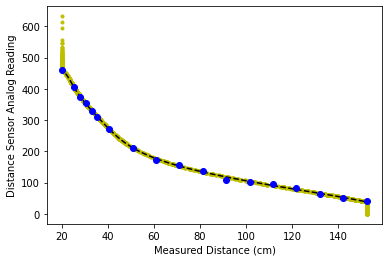

In [310]:
dsNP = np.load("calibration_data_1.npy")


print(dsNP)

c = np.polyfit(dsNP[:,1],dsNP[:,0],6)
print(c)

xp = np.linspace(np.amin(dsNP[:,1]),np.amax(dsNP[:,1]), 100)
# xp = np.linspace(0,400, 100)
p = np.poly1d(c)

i = 0
while i < numRows:
    if ptsrNP[i,2]>np.amax(dsNP[:,1]):
        ptsrNP[i,3] = np.amin(dsNP[:,0])
    elif ptsrNP[i,2]<np.amin(dsNP[:,1]):
        ptsrNP[i,3] = np.amax(dsNP[:,0])
    else:
        ptsrNP[i,3] = p(ptsrNP[i,2])
    i = i+1

# i = 0
# while i < numRows:
#     if ptsrNP[i,3]>100:
#         ptsrNP[i,3] = 0
#     elif ptsrNP[i,3]<10:
#         ptsrNP[i,3] = 0
#     else:
#         ptsrNP[i,3] = p(ptsrNP[i,2])
#     i = i+1

print(ptsrNP)

fig = plt.figure()
ax = plt.axes()
plt.plot(ptsrNP[:,3],ptsrNP[:,2],'y.', p(xp),xp, 'k--',dsNP[:,0],dsNP[:,1], 'bo')
ax.set_xlabel("Measured Distance (cm)")
ax.set_ylabel("Distance Sensor Analog Reading")

[[ 22.86 423.  ]
 [ 38.1  285.  ]
 [ 53.34 208.  ]
 [ 78.74 143.  ]]
[24.00273474 38.83680402 51.71060338 76.30450968]
[-1.14273474 -0.73680402  1.62939662  2.43549032]
10.435269270236788


Text(0.5, 1.0, 'Calibration Data With 6th Degree Ployfit \n -3.651e-13x^6 + 6.064e-10x^5 - 3.915e-07x^4 + 1.204e-04x^3 - 1.624e-02x^2 + 1.606e-01x + 1.641e+02')

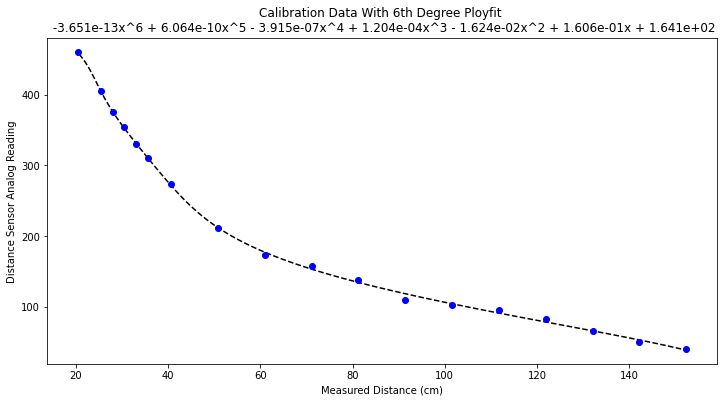

In [386]:
dsNP = np.load("calibration_data_1.npy")
dsTestNP = np.load("calibration_data_test_1.npy")
print(dsTestNP)

dsTestExpected = p(dsTestNP[:,1])
print(dsTestExpected)
errors = dsTestNP[:,0]-dsTestExpected
rss = sum((dsTestNP[:,0]-dsTestExpected)**2)
print(errors)
print(rss)


fig = plt.figure(figsize=(12, 6))
ax = plt.axes()
plt.plot(p(xp),xp, 'k--',dsNP[:,0],dsNP[:,1], 'bo')
ax.set_xlabel("Measured Distance (cm)")
ax.set_ylabel("Distance Sensor Analog Reading")
ax.set_title('Calibration Data With 6th Degree Ployfit \n -3.651e-13x^6 + 6.064e-10x^5 - 3.915e-07x^4 + 1.204e-04x^3 - 1.624e-02x^2 + 1.606e-01x + 1.641e+02')





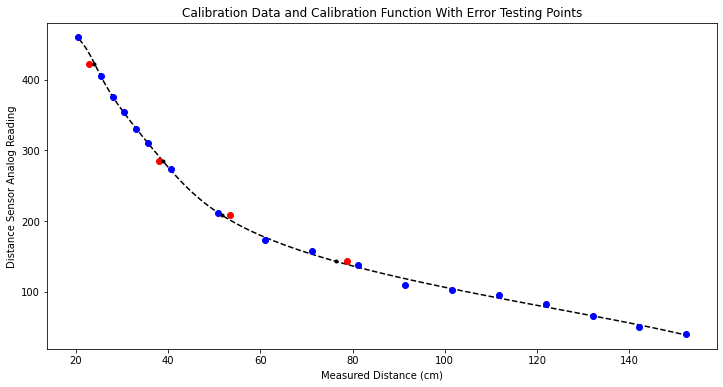

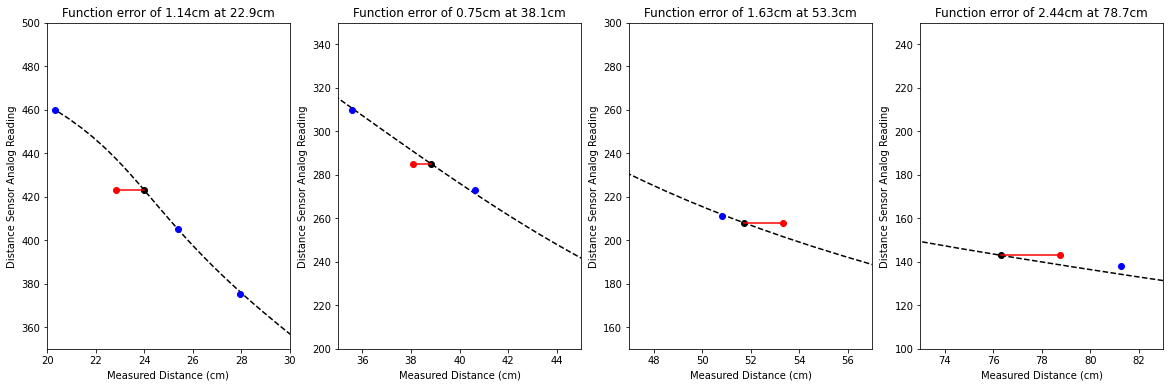

In [393]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes()
plt.plot(p(xp),xp, 'k--',dsNP[:,0],dsNP[:,1], 'bo', dsTestNP[:,0],dsTestNP[:,1], 'ro',dsTestExpected,dsTestNP[:,1], 'k.')
ax.set_xlabel("Measured Distance (cm)")
ax.set_ylabel("Distance Sensor Analog Reading")
ax.set_title('Calibration Data and Calibration Function With Error Testing Points')

fig = plt.figure(figsize=(20, 6))

ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

ax1.set_title('Function error of 1.14cm at 22.9cm')
ax1.plot(p(xp),xp, 'k--', label='')
ax1.plot(dsNP[:,0],dsNP[:,1], 'bo', label='')
ax1.plot(dsTestNP[:,0],dsTestNP[:,1], 'ro', label='')
ax1.plot(dsTestExpected,dsTestNP[:,1], 'ko', label='')
ax1.plot([dsTestExpected[0],dsTestNP[0,0]],[dsTestNP[0,1],dsTestNP[0,1]], 'r-', label='')
ax1.set_xlim([20, 30])
ax1.set_ylim([350, 500])
ax1.set_xlabel("Measured Distance (cm)")
ax1.set_ylabel("Distance Sensor Analog Reading")

ax2.set_title('Function error of 0.75cm at 38.1cm')
ax2.plot(p(xp),xp, 'k--', label='')
ax2.plot(dsNP[:,0],dsNP[:,1], 'bo', label='')
ax2.plot(dsTestNP[:,0],dsTestNP[:,1], 'ro', label='')
ax2.plot(dsTestExpected,dsTestNP[:,1], 'ko', label='')
ax2.plot([dsTestExpected[1],dsTestNP[1,0]],[dsTestNP[1,1],dsTestNP[1,1]], 'r-', label='')
ax2.set_xlim([35, 45])
ax2.set_ylim([200, 350])
ax2.set_xlabel("Measured Distance (cm)")
ax2.set_ylabel("Distance Sensor Analog Reading")

ax3.set_title('Function error of 1.63cm at 53.3cm')
ax3.plot(p(xp),xp, 'k--', label='')
ax3.plot(dsNP[:,0],dsNP[:,1], 'bo', label='')
ax3.plot(dsTestNP[:,0],dsTestNP[:,1], 'ro', label='')
ax3.plot(dsTestExpected,dsTestNP[:,1], 'ko', label='')
ax3.plot([dsTestExpected[2],dsTestNP[2,0]],[dsTestNP[2,1],dsTestNP[2,1]], 'r-', label='')
ax3.set_xlim([47, 57])
ax3.set_ylim([150, 300])
ax3.set_xlabel("Measured Distance (cm)")
ax3.set_ylabel("Distance Sensor Analog Reading")

ax4.set_title('Function error of 2.44cm at 78.7cm')
ax4.plot(p(xp),xp, 'k--', label='')
ax4.plot(dsNP[:,0],dsNP[:,1], 'bo', label='')
ax4.plot(dsTestNP[:,0],dsTestNP[:,1], 'ro', label='')
ax4.plot(dsTestExpected,dsTestNP[:,1], 'ko', label='')
ax4.plot([dsTestExpected[3],dsTestNP[3,0]],[dsTestNP[3,1],dsTestNP[3,1]], 'r-', label='')
ax4.set_xlim([73, 83])
ax4.set_ylim([100, 250])
ax4.set_xlabel("Measured Distance (cm)")
ax4.set_ylabel("Distance Sensor Analog Reading")

plt.show()

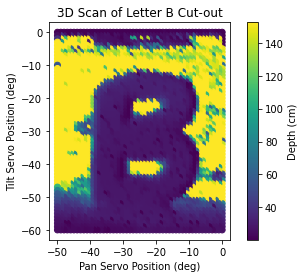

In [391]:
fig = plt.figure()
ax = plt.axes()
plt.scatter(-ptsrNP[:,0],-ptsrNP[:,1],s=None,c=ptsrNP[:,3])
ax.set_aspect('equal', 'box')
ax.set_xlabel("Pan Servo Position (deg)")
ax.set_ylabel("Tilt Servo Position (deg)")
ax.set_title('3D Scan of Letter B Cut-out')
plt.colorbar(label="Depth (cm)")

In [250]:
# np.save("scan2",ptsrNP)

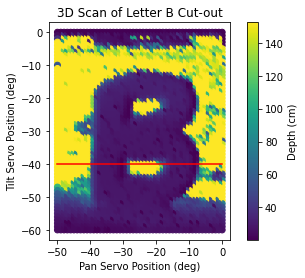

In [392]:
ptsrNP_loaded = np.load("scan2.npy")
fig = plt.figure()
ax = plt.axes()
plt.scatter(-ptsrNP[:,0],-ptsrNP[:,1],s=None,c=ptsrNP[:,3])
plt.plot([-50,0],[-40,-40],'r-')
ax.set_aspect('equal', 'box')
ax.set_xlabel("Pan Servo Position (deg)")
ax.set_ylabel("Tilt Servo Position (deg)")
ax.set_title('3D Scan of Letter B Cut-out')
plt.colorbar(label="Depth (cm)")

[ 34.          40.         393.          26.32493182]
[ 13.         40.        368.         28.8057148]
[ 47.   40.    6.  152.4]
[ 48.   40.    4.  152.4]
[ 41.   40.   22.  152.4]
[ 24.   40.    5.  152.4]
[  8.        40.       390.        26.598136]
[ 10.          40.         396.          26.05826284]
[ 38.          40.         361.          29.57839474]
[  4.   40.    5.  152.4]
[  9.    40.   476.    20.32]
[ 16.          40.         350.          30.84800025]
[ 26.   40.    6.  152.4]
[  2.   40.    0.  152.4]
[ 27.   40.    5.  152.4]
[ 35.          40.         373.          28.27326057]
[  3.   40.    5.  152.4]
[ 46.   40.    5.  152.4]
[ 29.          40.         151.          72.12487354]
[ 14.          40.         370.          28.59069586]
[ 15.         40.        368.         28.8057148]
[ 28.   40.    5.  152.4]
[ 21.   40.    6.  152.4]
[ 23.   40.   35.  152.4]
[ 22.   40.    5.  152.4]
[ 40.          40.         229.          47.32309887]
[ 39.          40.         3

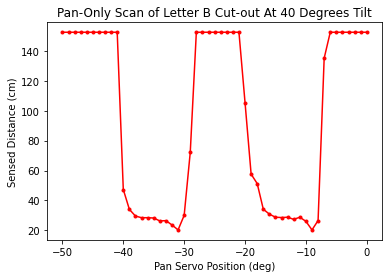

In [395]:
ptsr_by_tilt = ptsrNP_loaded[ptsrNP_loaded[:, 1].argsort()]

n = 51*40
for x in range(n, n + panMax-panMin+1):
    print(ptsr_by_tilt[x,:])

nEnd = n+panMax-panMin+1
ptsr_pan = ptsr_by_tilt[n:nEnd,:]
ptsr_pan = ptsr_pan[ptsr_pan[:, 0].argsort()]
print(ptsr_pan)

fig = plt.figure()
ax = plt.axes()
plt.plot(-ptsr_pan[:,0],ptsr_pan[:,3], 'r.-')
ax.set_xlabel("Pan Servo Position (deg)")
ax.set_ylabel("Sensed Distance (cm)")
ax.set_title('Pan-Only Scan of Letter B Cut-out At 40 Degrees Tilt')


np.save("scan3_pan_only", ptsr_pan)
